# Final Project - ARIA Indonesia

`Plant Nutrient Prediction`

## Introduction

Final Project by Arvin Assanny Batch HCK-003

### Background

We have a dataset which consist of plant nutrition test, this dataset was given by ARIA Indonesia

`target` contained information to predict plant nutrition.

`V1 - V8` contained information about variable to predict plant nutrition.

`sample_type` contained information about 2 different labs sample obtained.

### Objective

* Able to create a prediction model of plant nutritional data that has been obtained from the test lab.
* Able to explore and analyze the datasets.
* Able to explain how to evaluate the model.
* Able to explain the methodology used for every step, algorithm, data manipulation, data cleansing, etc.
* Able to provide further improvement plan.

### Problem Statement

We have to build a predictive model to calculate the most optimum plant nutrient

## Import Library

Import libraries we needed to do this project.

In [1]:
# Data Loading
import pandas as pd

#Importing Warning filtering
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix

#For removing outliers
from feature_engine.outliers import Winsorizer

# Data Preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# Feature Selection (manual)
import numpy as np

# Model Definition
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Model Evaluation
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

# Model Inference
import pickle

# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For showing our time
import time

## Data Loading
Here we load our data, which in excel format and show the 5 first and last rows of its data.

In [2]:
df = pd.read_excel('aria_data.xlsx')
df.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1


In [3]:
df.tail()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
155,4.83,573.2500,361.250000,643.125000,489.812500,666.875,355.250000,712.312500,3943.687500,lab 2
156,4.47,678.3750,398.125000,678.250000,541.125000,704.000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.0000,382.866667,657.466667,505.066667,719.200,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.3125,366.750000,642.937500,483.687500,675.625,359.062500,730.125000,3859.062500,lab 2
159,4.43,575.2000,350.266667,648.333333,495.400000,679.800,346.266667,718.733333,3903.333333,lab 2


## Data Description

We want to take a quick overview with our dataset we have.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


We have 160 rows, without a missing value on the dataset.

Our dataset mainly consist of numerical.

In [5]:
df.target.nunique()

72

Our target variable has so much variance, so it is safe to say that this is a true numerical column not categorical-like.

In [6]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
target,160.0,4.733750,0.214050,4.130000,4.600000,4.720000,4.890000,5.260000
v1,160.0,389.892437,148.673511,227.285714,268.608333,295.162500,536.409375,678.375000
v2,160.0,237.442677,70.128690,178.800000,194.029018,204.187500,244.716667,422.812500
v3,160.0,480.573041,118.798984,348.933333,384.419643,414.383929,591.611404,722.312500
v4,160.0,394.109622,63.060442,313.733333,353.181250,370.741667,424.131250,558.500000
v5,160.0,487.316520,100.941711,373.333333,418.583333,456.031250,496.475000,721.000000
v6,160.0,251.450820,59.634652,189.200000,213.000000,226.062500,262.531250,415.375000
v7,160.0,714.737926,51.148098,586.266667,678.385417,718.833333,751.446875,853.466667
v8,160.0,4456.913233,335.035933,3725.666667,4273.437500,4554.766667,4700.612500,5086.375000


Here we show the central tendency of our data.

From this information, we know that we have some skewed data or even an outlier, which we need to handle it later.

In [7]:
# Checking unique value of our columns
print(f'Number of unique values :', df['sample_type'].nunique())
df['sample_type'].value_counts()

Number of unique values : 2


lab 1    100
lab 2     60
Name: sample_type, dtype: int64

in our sample_type, we know that we have two labs where the test was ran.

In [8]:
numeric = ['target', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']
num_cols = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']

## Exploratory Data Analysis

Here we want to explore more about our data.

### Categorical Analysis

We want to take a look at our categorical column.

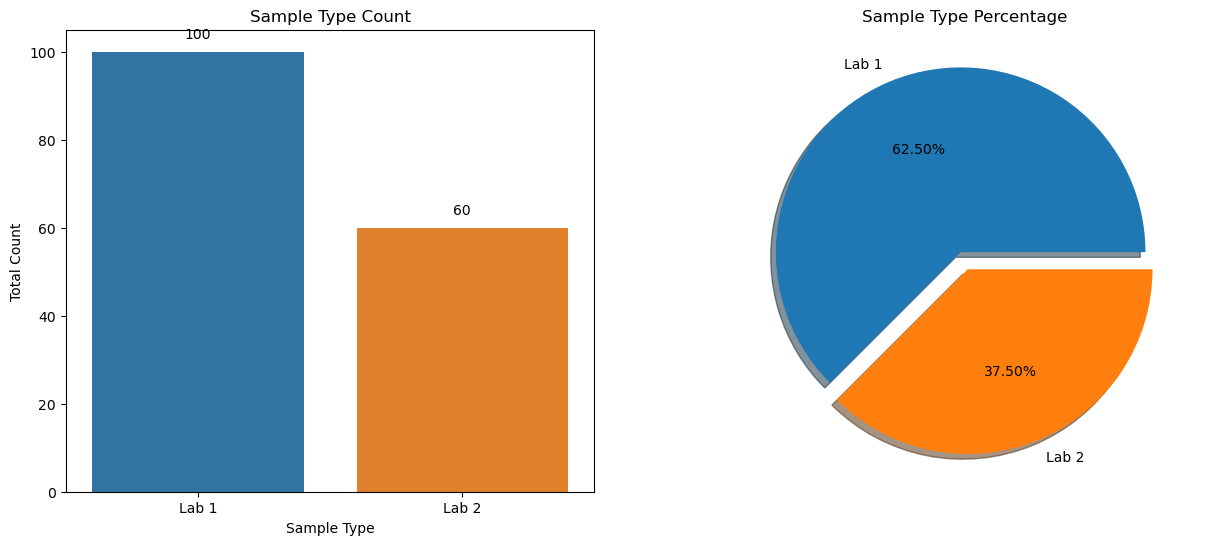

In [9]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='sample_type', data=df)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center")
plt.title('Sample Type Count')
fig.set_xticklabels(['Lab 1','Lab 2'])
plt.xlabel('Sample Type')
plt.ylabel('Total Count')
plt.subplot(1, 2, 2)
plt.pie(df['sample_type'].value_counts(), labels=['Lab 1','Lab 2'], autopct='%1.2f%%', explode=[0.05, 0.05], shadow=True)
plt.title('Sample Type Percentage')
plt.show()

From this plot we know that:
* lab 1 is the most used lab to run the test
* lab 1 is used for 100 test and lab 2 for 60 test.

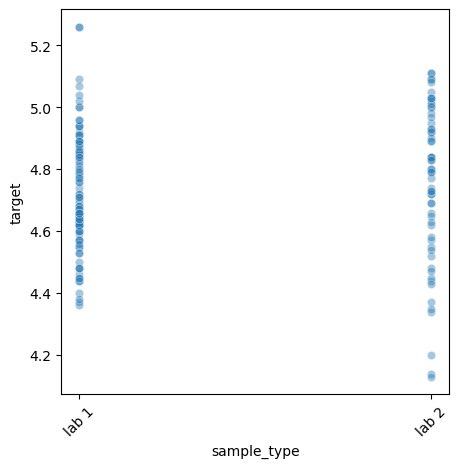

In [10]:
plt.figure(figsize=(5,5))
sns.scatterplot(x = 'sample_type', y = 'target', data = df, alpha=0.4)
plt.xticks(rotation=45)
plt.show()

* From this plot, we know that lab 2 produced a lower target value than lab 1 test result.
* Also, lab 1 test result has a slightly more consistent test result.

### Numerical Analysis

We want to know the coded variable more(v1-v8)

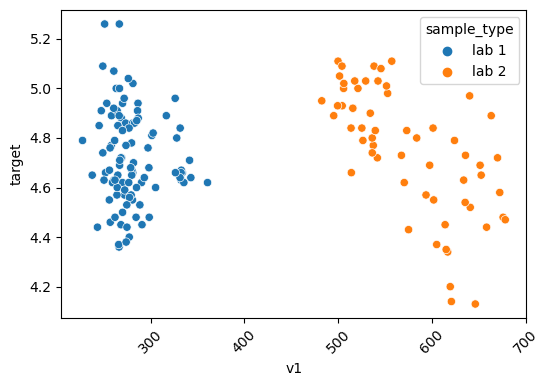

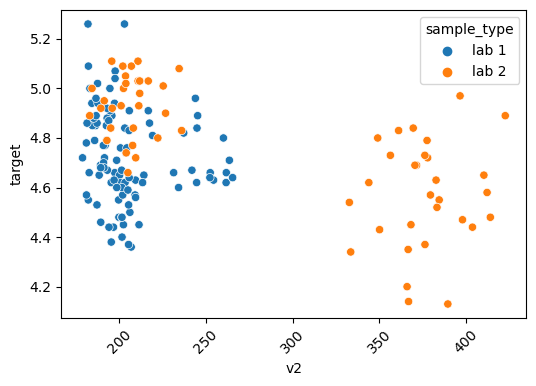

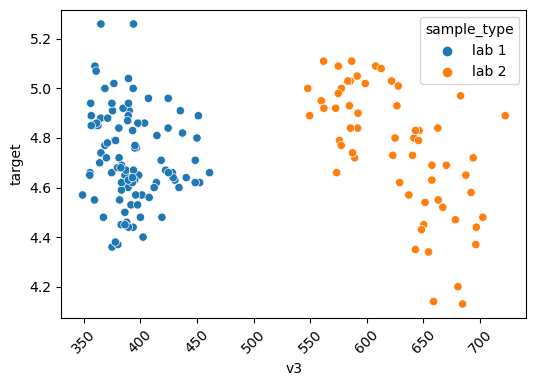

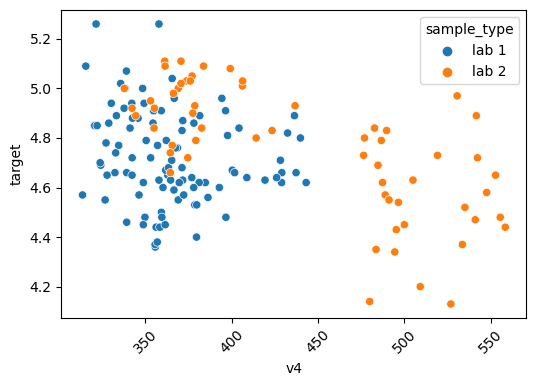

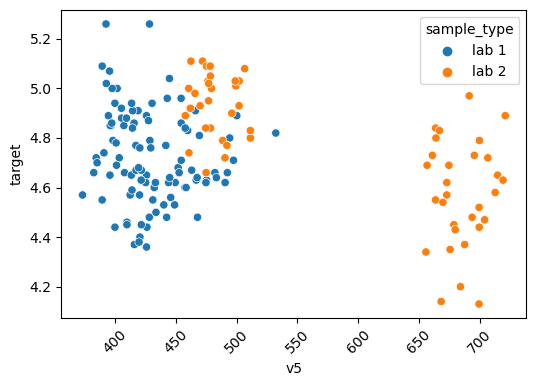

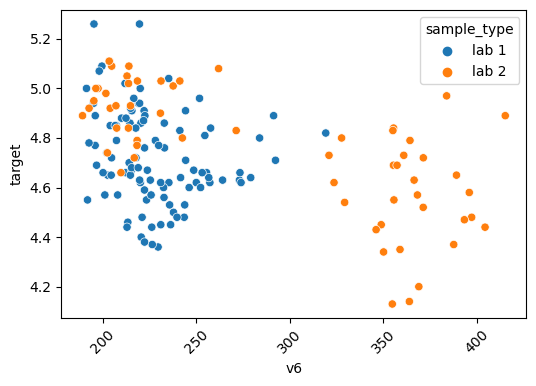

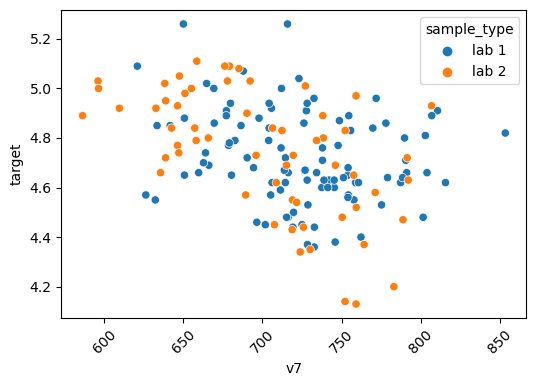

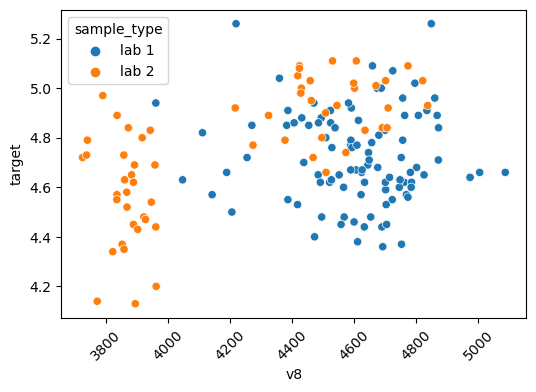

In [11]:
for col in num_cols:
  plt.figure(figsize=(6,4))
  sns.scatterplot(x=col, y='target', hue='sample_type', data=df)
  plt.xticks(rotation=45)

From this plot we can see that:
* v1 and v3 has similar result
* v2, v4, and v5 has similar result
* v6, v7, and v8 has similar result

This could mean that the variable which added into the plant nutrient has a similar effects with each other.

We also know that our data variable is not linear, so our model result may have a low r2 score, which is a measure of how well a statistical model fits the data, with values ranging from 0 to 1, where 1 indicates a perfect fit.

### Data Distribution & Outliers

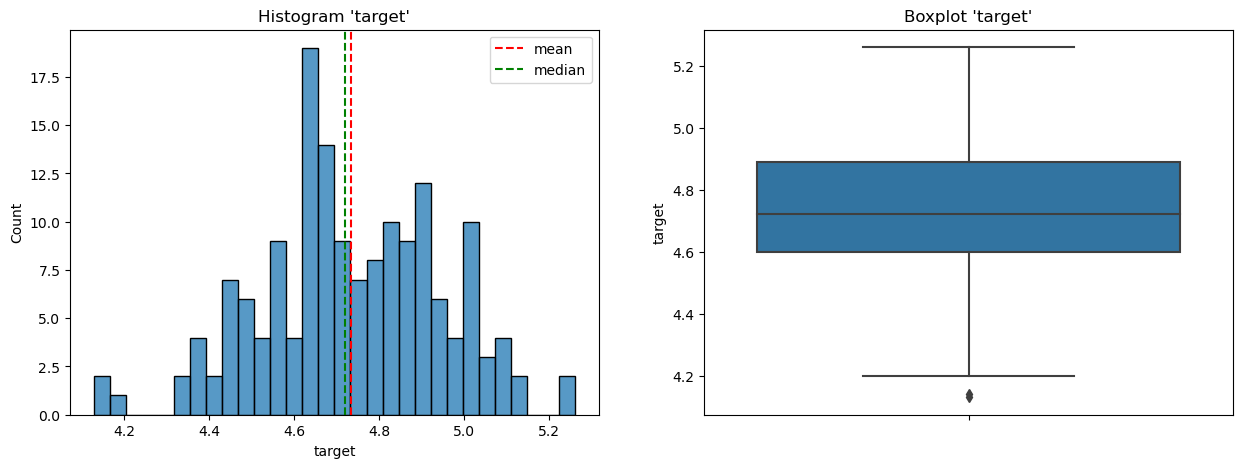

target Kurtosis: -0.09484772822809973
target Skewness: -0.15828173643344287
Columns 'target' Normal Distribution


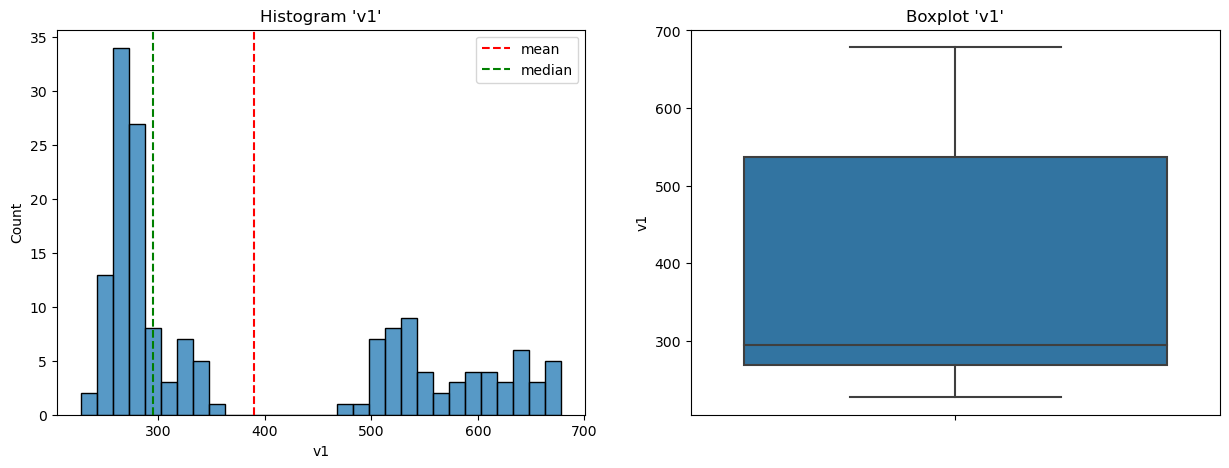

v1 Kurtosis: -1.302303477227893
v1 Skewness: 0.6399112607855549
Columns 'v1' Right Moderately Skewed


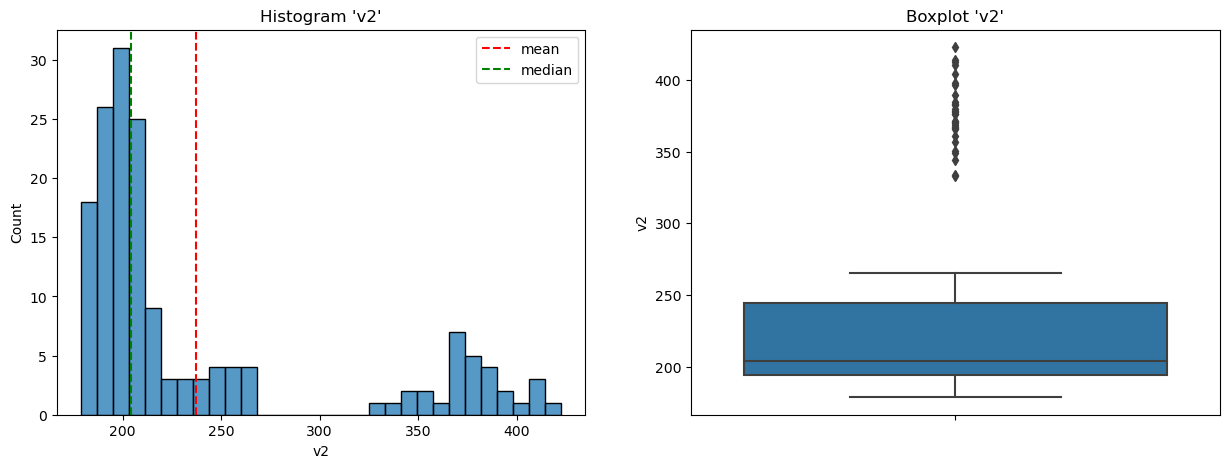

v2 Kurtosis: 0.5613001936366695
v2 Skewness: 1.4617281099191999
Columns 'v2' Right Highly Skewed


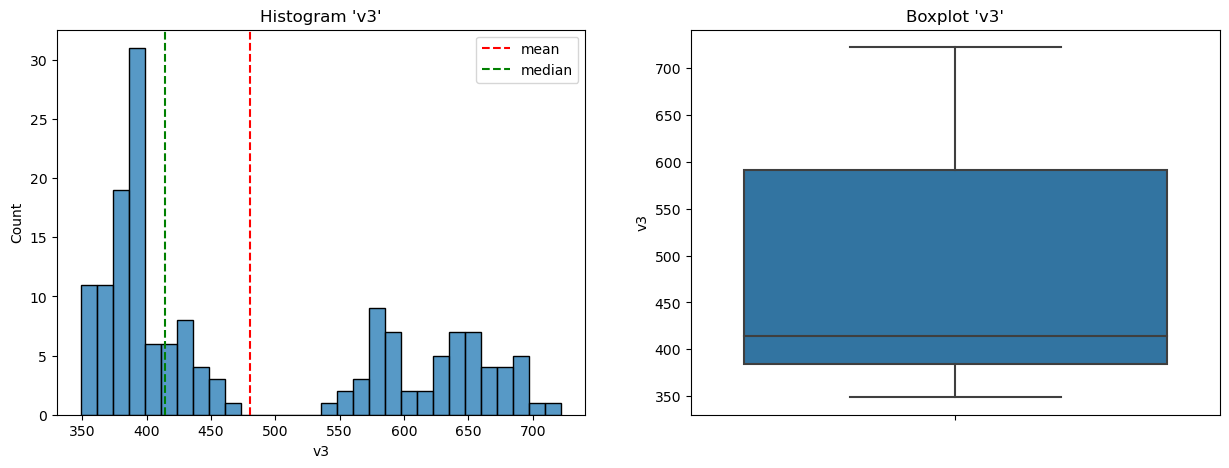

v3 Kurtosis: -1.3300615503973148
v3 Skewness: 0.6026551795688342
Columns 'v3' Right Moderately Skewed


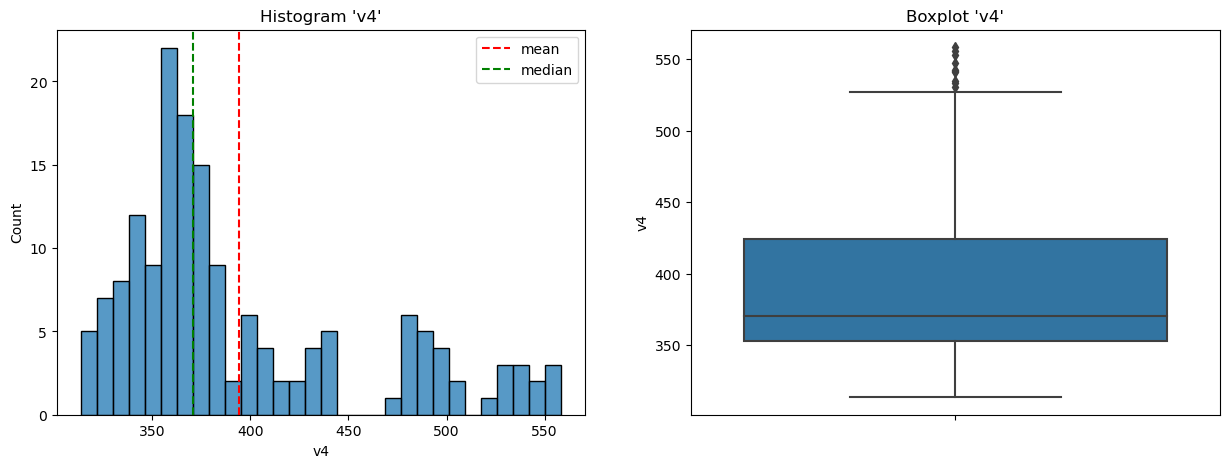

v4 Kurtosis: 0.21291982275374632
v4 Skewness: 1.1436931932699348
Columns 'v4' Right Highly Skewed


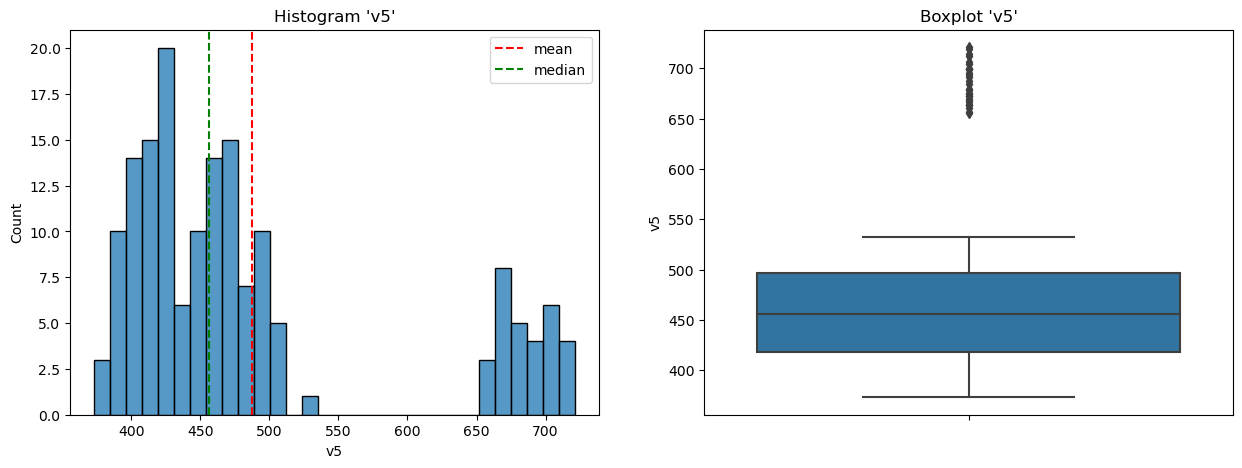

v5 Kurtosis: 0.17209924212709327
v5 Skewness: 1.2706398850462628
Columns 'v5' Right Highly Skewed


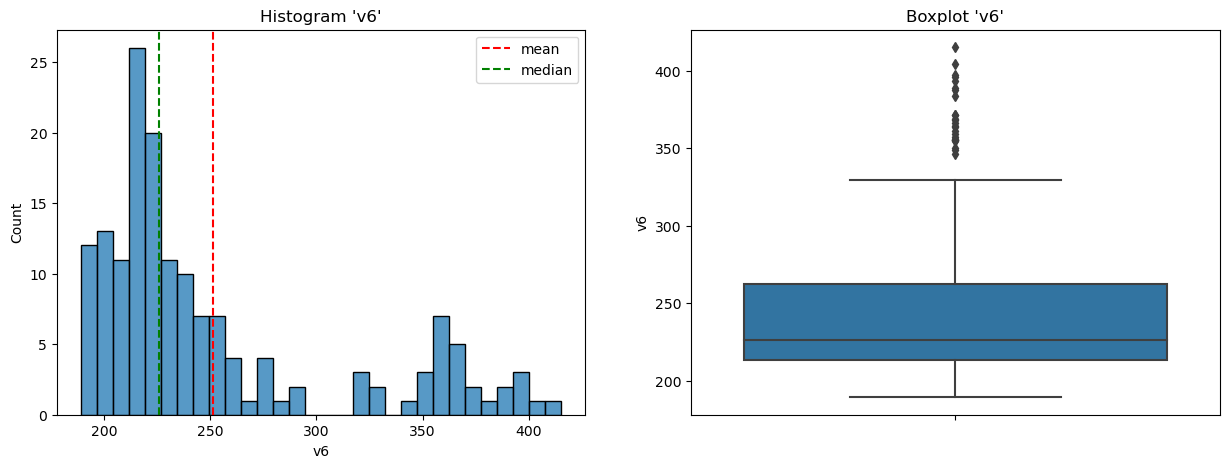

v6 Kurtosis: 0.35312495449855374
v6 Skewness: 1.2954833782360857
Columns 'v6' Right Highly Skewed


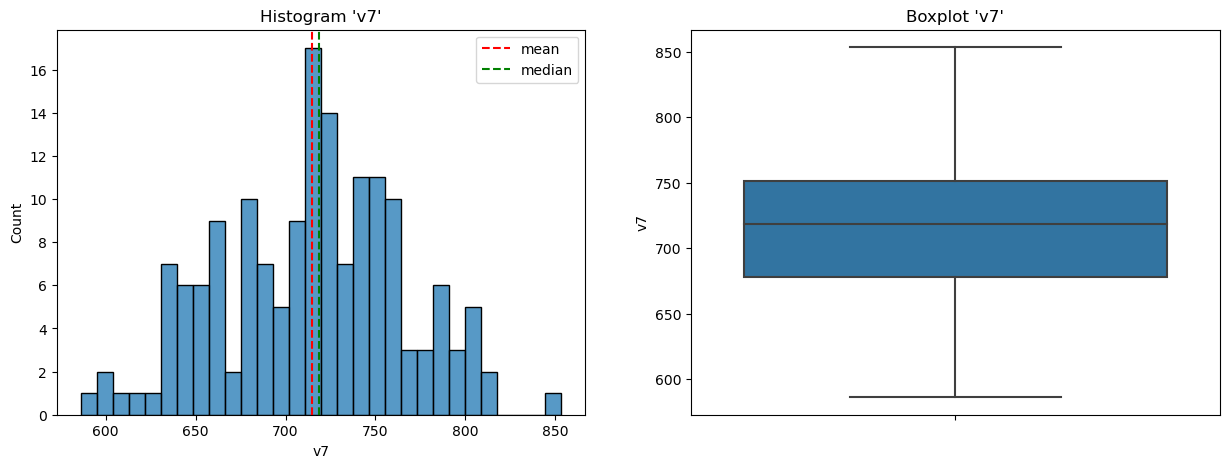

v7 Kurtosis: -0.34147991654474863
v7 Skewness: -0.10723483952914095
Columns 'v7' Normal Distribution


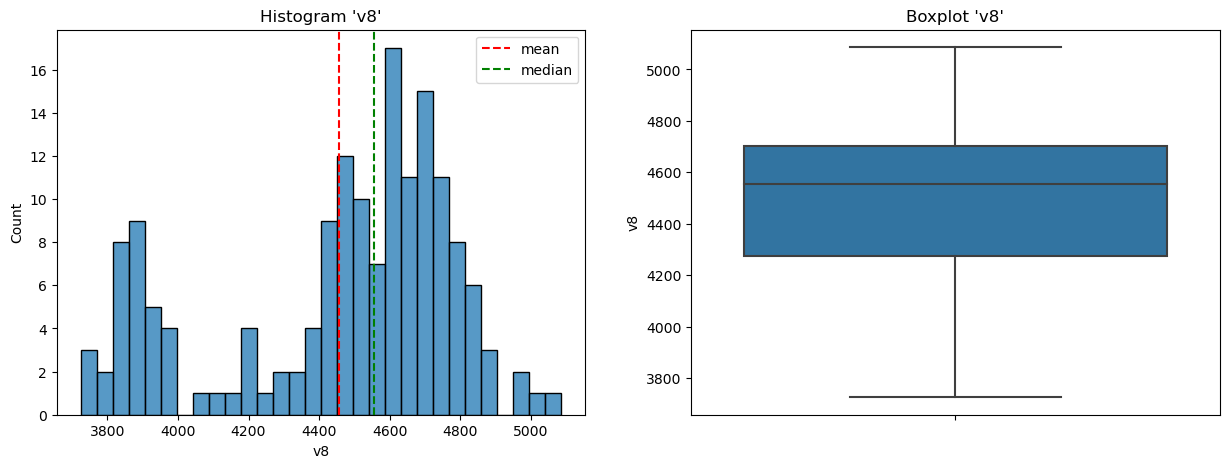

v8 Kurtosis: -0.5311192838311856
v8 Skewness: -0.7664435142947442
Columns 'v8' Left Moderately Skewed


In [12]:
def dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' Normal Distribution".format(col))
    elif df[col].skew() > 0.5 and df[col].skew() <= 1 :
        print("Columns '{}' Right Moderately Skewed".format(col))
    elif df[col].skew() > 1:
        print("Columns '{}' Right Highly Skewed".format(col))
    elif df[col].skew() < -0.5 and df[col].skew() >= -1 :
        print("Columns '{}' Left Moderately Skewed".format(col))
    elif df[col].skew() < -1:
        print("Columns '{}' Left Highly Skewed".format(col))

dnum = df[numeric]

for col in dnum.columns:
    dist(df[numeric], col)

In [13]:
for k, v in df[numeric].items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df[numeric])[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column target outliers = 1.25%
Column v1 outliers = 0.00%
Column v2 outliers = 18.75%
Column v3 outliers = 0.00%
Column v4 outliers = 6.25%
Column v5 outliers = 18.75%
Column v6 outliers = 16.25%
Column v7 outliers = 0.00%
Column v8 outliers = 0.00%


Here we can see our data distribution. We know that some of our data has a skewed distribution, and also has some outliers on it. We want to handle this problem later on

### Check Correlation

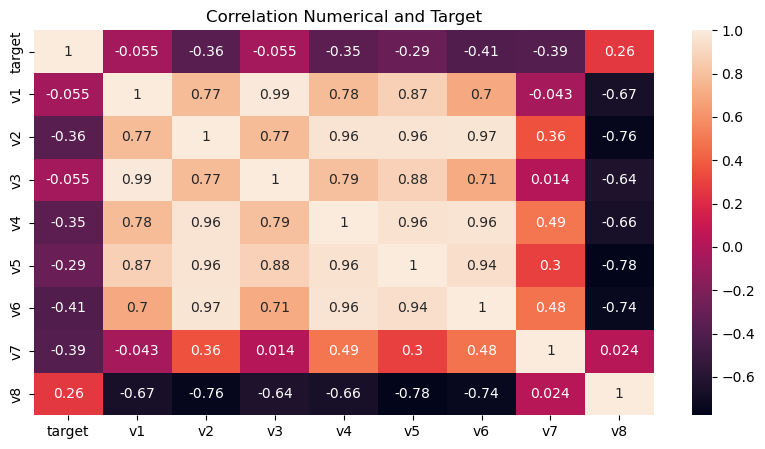

In [14]:
# Correlation between numerical and the target label
num_corr = df[numeric]
plt.figure(figsize=(10,5))
sns.heatmap(num_corr.corr(),annot=True)
plt.title("Correlation Numerical and Target")
plt.show()

del num_corr

Here we use pearson correlation as our basic correlation, since this calcuation can be used on numerical features like we use here.

We know that almost all the feature has a good value of correlation with target, eventhough almost all of it has a negative correlation with ur target. Negative correlation could mean that the more one variable being added, the lower target value will become.

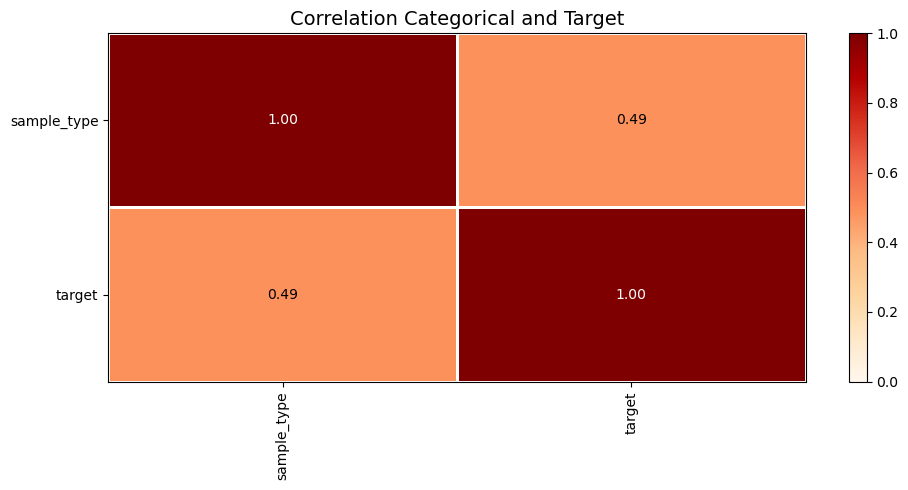

In [15]:
# Categorical and target
df_cat = df[['target', 'sample_type']]
corr_p = df_cat.phik_matrix(interval_cols='churn_risk_score')

plot_correlation_matrix(corr_p.values, 
                        x_labels=corr_p.columns, 
                        y_labels=corr_p.index, 
                        vmin=0, vmax=1, color_map="OrRd", 
                        title=r"Correlation Categorical and Target", 
                        figsize=(10,5))
plt.show()

To check the categorical feature we use Phi-K correaltion, beacuse it can be used on both categorical and numerical. The downside is that we can't know whether the correlation is negative or positive.

## Feature Engineering

#### Data Manipulation

In [16]:
df['vc1'] = df['v1']+df['v3']
df['vc2'] = df['v2']+df['v4']+df['v5']
df['vc3'] = df['v6']+df['v7']+df['v8']

Here we decided to sum the similar result into one column. We did this beacuse it may increase our model perfomance.

We also try to make a clustering, because after several try and error we know that adding cluster may increase our metrics score. This is maybe when we cluster the features who have similar data points our model can learn the patern much better.

Here we use n_cluster=5, this is acquired after some trials.

In [17]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'vc1', 'vc2', 'vc3']])

KMeans(n_clusters=5)

In [18]:
df['nut_type'] = kmeans.labels_

Now we make a new column to save our clustering steps.

### Feature Selection

In [19]:
feature = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'vc1', 'vc2', 'vc3', 'sample_type', 'nut_type']
target = ['target']

Here we do feature selection, where we want to include all of our columns since it all has a good correaltion.

### Data Split

In [20]:
# Feature and target split
X = df[feature]
y = df[target]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=41)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (128, 13)
Test Size  :  (32, 13)


Here we split our data.

### Preprocessing Pipeline
Now we make a preporcessing pipeline to help us make our preprocessing step faster.

In [22]:
num_cols = X[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'vc1', 'vc2', 'vc3']].columns.tolist()
cat_cols = X[['sample_type', 'nut_type']].columns.tolist()

print(f'Number of numerical columns: {len(num_cols)}')
print(f'Numerical columns: {num_cols}')
print(f'Number of categorical columns: {len(cat_cols)}')
print(f'Categorical columns: {cat_cols}')


X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols]
X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]

Number of numerical columns: 11
Numerical columns: ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'vc1', 'vc2', 'vc3']
Number of categorical columns: 2
Categorical columns: ['sample_type', 'nut_type']


Now we will build our pipeline.

Here we use winsorizer to cap our outliers, we do this because our data is already small and we do not want to reduce it even further.

We also use QuantileTransformer to normalize our skewed data distribution in some of our features.

In [23]:
# Define pipeline for numerical & categorical features
num_pipe = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
        ('norm', QuantileTransformer(output_distribution='normal')),
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=2))
    ])
cat_pipe = Pipeline([
        ('encoder', OrdinalEncoder())
    ])

# Preprocessing pipeline
preprocessing = ColumnTransformer([
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols),
    ])

Here we use pca, which is a technique commonly used in unsupervised learning for dimensionality reduction. However, in supervised learning, PCA can be used as a preprocessing step to transform the input data into a lower-dimensional space that preserves the most important information.

By using PCA, you can reduce the number of features or variables in the data and remove any correlated variables. This can help to improve the performance of a supervised learning model by reducing the noise and improving the model's ability to generalize to new data.

We use n_components=2 because we feel want to turn it into two-dimensional space while preserving as much information as possible.

#### Preprocessing.

In [24]:
X_train_tr = preprocessing.fit_transform(X_train)

In [25]:
X_test_tr = preprocessing.transform(X_test)

Here we transform our train and test data.

## Model Definition

In [26]:
# Define model we will use
lr = LinearRegression()
svr = SVR()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

Here we use some variations of regression models.

### Cross Validation

 The purpose of cross-validation is to estimate how well the model is likely to perform on new, unseen data, which is critical for assessing the generalization ability of the model.

In [27]:
# checking cross validation score
cv_linreg_model = cross_val_score(lr, X_train_tr, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_svr_model = cross_val_score(svr, X_train_tr, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_dtr_model = cross_val_score(dtr, X_train_tr, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_rfr_model = cross_val_score(rfr, X_train_tr, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_knr_model = cross_val_score(knr, X_train_tr, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_gbr_model = cross_val_score(gbr, X_train_tr, y_train, cv=5, scoring='neg_mean_absolute_error')
name_model = []
cv_scores=0
for cv,name in zip([cv_linreg_model,cv_svr_model,cv_dtr_model,cv_rfr_model,cv_knr_model,cv_gbr_model],['lr_model','svr_model','dtr_model','rfr_model','knr_model','gbr_model']):
    print(name)
    print('neg_mean_absolute_error  - All - Cross Validation  : ', cv)
    print('neg_mean_absolute_error  - Mean - Cross Validation : ', cv.mean())
    print('neg_mean_absolute_error  - Std - Cross Validation  : ', cv.std())
    print('neg_mean_absolute_error  - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)

lr_model
neg_mean_absolute_error  - All - Cross Validation  :  [-0.14700874 -0.14788838 -0.12574275 -0.14191299 -0.14114922]
neg_mean_absolute_error  - Mean - Cross Validation :  -0.14074041498623202
neg_mean_absolute_error  - Std - Cross Validation  :  0.007960618403294591
neg_mean_absolute_error  - Range of Test-Set       :  -0.14870103338952662 - -0.13277979658293743
--------------------------------------------------
svr_model
neg_mean_absolute_error  - All - Cross Validation  :  [-0.14229567 -0.14492851 -0.14078501 -0.14713332 -0.13380131]
neg_mean_absolute_error  - Mean - Cross Validation :  -0.1417887653341357
neg_mean_absolute_error  - Std - Cross Validation  :  0.004549419331567498
neg_mean_absolute_error  - Range of Test-Set       :  -0.1463381846657032 - -0.1372393460025682
--------------------------------------------------
dtr_model
neg_mean_absolute_error  - All - Cross Validation  :  [-0.19115385 -0.20461538 -0.18846154 -0.2128     -0.2052    ]
neg_mean_absolute_error  - M

Here we choose the SVR as the best model from the cross validation process, since it has the better score than the rest.

We use neg_mean_absolute_error to evaluate the performance of a machine learning model based on its ability to predict the target variable and select the best model or parameter settings that minimize the error.

## Model Training

Now we train our model using the train set.

In [28]:
svr.fit(X_train_tr, y_train)

SVR()

In [29]:
svr_pred_train = svr.predict(X_train_tr)
svr_pred_test = svr.predict(X_test_tr)

Now predict using the model

## Model Evaluation
In this model evaluation, we use MAE and R2 Score.

* We use MAE(Mean Absolute Error) because it gives us the average absolute difference between the predicted and actual values of the target variable. It provides a measure of the errors, where a smaller MAE indicates better performance.
* We use R2 score beacuse it shows well the model fits the data relative to a baseline model, such as a model that always predicts the mean value of the target variable. R2 score ranges from 0 to 1, where 1 indicates a perfect fit, and values close to 0 indicate poor performance.

By using both MAE and R2 score, you can gain a better understanding of the performance of the model. MAE provides information about the magnitude of errors, while R2 score provides information about how well the model fits the data. 

In [30]:
# Evaluate Model using MAE and r2
print('----Training Set----')
print('MAE train = ', mean_absolute_error(y_train, svr_pred_train))
print('r2score train = ', r2_score(y_train, svr_pred_train))
print('----Testing Set----')
print('MAE test = ', mean_absolute_error(y_test, svr_pred_test))
print('r2score test = ', r2_score(y_test, svr_pred_test))

----Training Set----
MAE train =  0.12816397690060044
r2score train =  0.38452821887901933
----Testing Set----
MAE test =  0.15975716320321062
r2score test =  0.4004744314360372


* The MAE for the training set is 0.128, which indicates that the model's predictions are off by an average of approximately 0.128 units from the actual values in the training set. The MAE for the testing set is slightly higher at 0.159, indicating that the model's performance is slightly worse on the unseen data.

* The R2 score for the training set is 0.384. The R2 score for the testing set is slightly higher at 0.400, indicating that the model's ability to fit the data is slightly better on the unseen data.

Overall this model, is not quite good as we want it to be. This can be seen from the quite high errors and low R2 Score. We can say this model is underfitting, which means that the model perfomance is bad and may lead to mis-prediction.

## Model Tuning

After get our result using baseline model, we try to improve our model.

For the parameter we tuned we choose the most used one, and using gridsearchcv to obtain a better tuning.

In [31]:
# Define the hyperparameters to tune
parameters = {'kernel': ['linear', 'rbf','sigmoid'],
              'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100],
              'epsilon': [0.1, 1, 10]}

# Tune the hyperparameters using GridSearchCV
grid_search = GridSearchCV(svr, param_grid=parameters, cv=10, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_tr, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'C': 1, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


Here we know the best parameters for our case.

In [32]:
# Train the SVR model using the best hyperparameters
tuned_model = SVR(**grid_search.best_params_)
tuned_model.fit(X_train_tr, y_train)

SVR(C=1, gamma=0.1, kernel='linear')

Now we want to train then predict using the tuned model.

In [33]:
tuned_model_pred_train = tuned_model.predict(X_train_tr)
tuned_model_pred_test = tuned_model.predict(X_test_tr)

## Tuned Model Evaluation

We still use the same metrics like the previous model.

In [34]:
# Evaluate Model using MAE and r2
print('----Training Set----')
print('MAE train = ', mean_absolute_error(y_train, tuned_model_pred_train))
print('r2score train = ', r2_score(y_train, tuned_model_pred_train))
print('----Testing Set----')
print('MAE test = ', mean_absolute_error(y_test, tuned_model_pred_test))
print('r2score test = ', r2_score(y_test, tuned_model_pred_test))

----Training Set----
MAE train =  0.13606123523222477
r2score train =  0.29783057102210364
----Testing Set----
MAE test =  0.17170915566000047
r2score test =  0.26827515195249807


We can see that after tuning our tuned model performance is much worse than the baseline. This model is more underfiting than our intial model. There are maybe some reasons behind this may be due to a failure to find the best hyperparameters. For example, the tuning process may have explored hyperparameters that did not improve performance, or it may have converged to a local minimum instead of the global minimum of the optimization problem.

## Model Prediction

Here we want to see the predicted result from our two models.

In [35]:
# Make dataframe from model prediction
svr_pred_test_df = pd.DataFrame(svr_pred_test, columns=['Prediction SVR'])
tuned_model_pred_test_df = pd.DataFrame(tuned_model_pred_test, columns=['Prediction Tuned SVR'])

In [36]:
y_test.reset_index(drop=True, inplace=True)

In [37]:
# Concate data test with model prediction
data_test_pred = pd.concat([y_test, svr_pred_test_df, tuned_model_pred_test_df],axis=1)
data_test_pred.head(10)

,target,Prediction SVR,Prediction Tuned SVR
0,4.92,4.932505,4.970564
1,4.72,4.623152,4.581919
2,4.68,4.659514,4.690279
3,4.63,4.657258,4.666632
4,4.34,4.605101,4.641587
5,4.55,4.606769,4.642932
6,5.07,4.784154,4.736071
7,4.72,4.792366,4.845636
8,4.93,4.922070,4.937148
9,4.86,4.676546,4.682997


The diferences between predicted result is not quite accurate, which is not good for the business. We have a difference of 0.15 on average compared to the real result, it may not seem that much but with the scale of target is also small, it may have a bigger impact.

This means when the company want to make a plant nutrient for its product, they may make a wrong calculation. So the plant that has been given this prediction may, have higher nutrient or lower nutrient than it should be given. For this predictive model to be good, we suggest to reduce the error to be 0.0x (or lower than right now). So the predcition is not too damaging to the business.

## Overall Analysis & Conclusion

From EDA sectiom, we know that:
* lab 1 is the most used lab to run the test and lab 1 is used for 100 test and lab 2 for 60 test.
* From this plot, we know that lab 2 produced a lower target value than lab 1 test result. Also, lab 1 test result has a slightly more consistent test result.
* We also know that our data variable is not linear, so our model result may have a low r2 score, which is a measure of how well a statistical model fits the data, with values ranging from 0 to 1, where 1 indicates a perfect fit.
* Here we can see our data distribution. We know that some of our data has a skewed distribution, and also has some outliers on it.
* We know that almost all the feature has a good value of correlation with target, eventhough almost all of it has a negative correlation with ur target. Negative correlation could mean that the more one variable being added, the lower target value will become.

We prepare our data using some process, which are:
* Here we decided to sum the similar result into one column. We did this beacuse it may increase our model perfomance.
* We also try to make a clustering, because after several try and error we know that adding cluster may increase our metrics score.
* We use winsorizer to cap our outliers, we do this because our data is already small and we do not want to reduce it even further.
* We also use QuantileTransformer to normalize our skewed data distribution in some of our features.
* We use PCA, which is a technique commonly used in unsupervised learning for dimensionality reduction. However, in supervised learning, PCA can be used as a preprocessing step to transform the input data into a lower-dimensional space that preserves the most important information.

From Overall model analysis we know that:
* The baseline model is the best one, this maybe caused due to a failure to find the best hyperparameters. For example, the tuning process may have explored hyperparameters that did not improve performance, or it may have converged to a local minimum instead of the global minimum of the optimization problem.
* Our model when used to predict test set is not quite good, and we consider it to be slightly underfiting because the prediction we have is still off for some points, which is not good.

For further improvement, we can do:
* We may need to scale up our data train so the model may learn the patern more and increase the score.
* We may need to different data manipulation methods.
* Try tuning with different parameters.